# Homework 2

This question concerns Fisher’s iris data, one of the most well-known and, perhaps, overused
datasets. I have placed the data (“Iris.csv”) on the Canvas site for the class. For this
homework, I would like you to apply linear and quadratic discriminant analysis to see if the
measured values or petal length and width and sepal length and width can be used to
discriminate among the three species of iris.

a. Summarize the four measured variables for the three types of iris. Are the data
    approximately normal, and do they look like they have the same covariance matrix for
    all 3 species?

In [2]:
library(MASS)
library(glue)
library(caret)
library(verification)

In [3]:
kappa=function(x){
      n=sum(x)
      pobs=(x[1,1]+x[2,2])/n
      pexp=(sum(x[1,])*sum(x[,1])+sum(x[2,])*sum(x[,2]))/n^2
      kappa=(pobs-pexp)/(1-pexp)
      t1=0
      t2=0
      t3=0
      pii=x/n
      pidot=apply(pii,1,sum)
      pdotj=apply(pii,2,sum)
      for(i in 1:2){
            t1 = t1 + pii[i,i]*((1-pexp) - (1-pobs)*(pidot[i]+pdotj[i]))^2
      }
      t2 = pii[1,2]*(pdotj[1]+pidot[2])^2 + pii[2,1]*(pdotj[2] + pidot[1])^2
      t3 = (pobs*pexp-2*pexp+pobs)^2
      vhat = (t1 + t2*(1-pobs)^2 -t3)/(n*(1-pexp)^4)
      se=sqrt(vhat)
      return(c(kappa,se))
}


class.sum=function(truth,predicted){
     xt=table(truth,round(predicted+0.000001))
     pcc=round(100*sum(diag(xt))/sum(xt),2)
     spec=round(100*xt[1,1]/sum(xt[1,]),2)
     sens=round(100*xt[2,2]/sum(xt[2,]),2)
     kap=round(kappa(xt)[1],4)
     au=round(roc.area(truth,predicted)$A,4)
     return(cbind(c("Percent Correctly Classified = ","Specificity = ","Sensitivity = ","Kappa =","AUC= "),c(pcc,spec,sens,kap,au)))
     }


In [4]:
iris <- read.csv("../../Data/Iris.csv")

In [5]:
setosa <- iris[iris$Species == "setosa", 1:4]
versicolor <- iris[iris$Species == "versicolor", 1:4]
virginica <- iris[iris$Species == "virginica", 1:4]

## Setosa

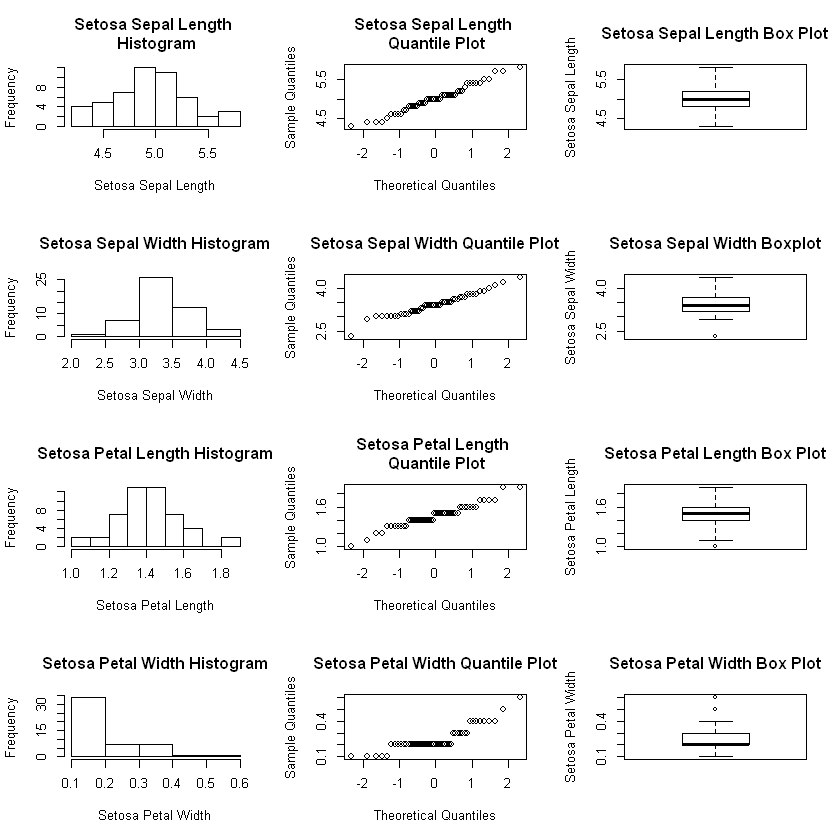

In [6]:
par(mfrow=c(4,3))
hist(setosa$SepalLength,
     main = 'Setosa Sepal Length \n Histogram',
     xlab = 'Setosa Sepal Length')
qqnorm(setosa$SepalLength,
       main = 'Setosa Sepal Length \n Quantile Plot')
boxplot(setosa$SepalLength,
        main = 'Setosa Sepal Length Box Plot',
        ylab = 'Setosa Sepal Length')
hist(setosa$SepalWidth,
     main = 'Setosa Sepal Width Histogram',
     xlab = 'Setosa Sepal Width')
qqnorm(setosa$SepalWidth,
       main = 'Setosa Sepal Width Quantile Plot')
boxplot(setosa$SepalWidth,
        main = 'Setosa Sepal Width Boxplot',
        ylab = 'Setosa Sepal Width')
hist(setosa$PetalLength,
     main = 'Setosa Petal Length Histogram',
     xlab = 'Setosa Petal Length')
qqnorm(setosa$PetalLength,
       main = 'Setosa Petal Length \n Quantile Plot')
boxplot(setosa$PetalLength,
        main = 'Setosa Petal Length Box Plot',
        ylab = 'Setosa Petal Length')
hist(setosa$PetalWidth,
     main = 'Setosa Petal Width Histogram',
     xlab = 'Setosa Petal Width')
qqnorm(setosa$PetalWidth,
       main = 'Setosa Petal Width Quantile Plot')
boxplot(setosa$PetalWidth,
        main = 'Setosa Petal Width Box Plot',
        ylab = 'Setosa Petal Width')

For the Setosa species of Iris the variables of Sepal Width, Sepal Length, and Petal Length are approximately normal. While the Petal Width appears to have a right skew to the data. 

## Versicolor

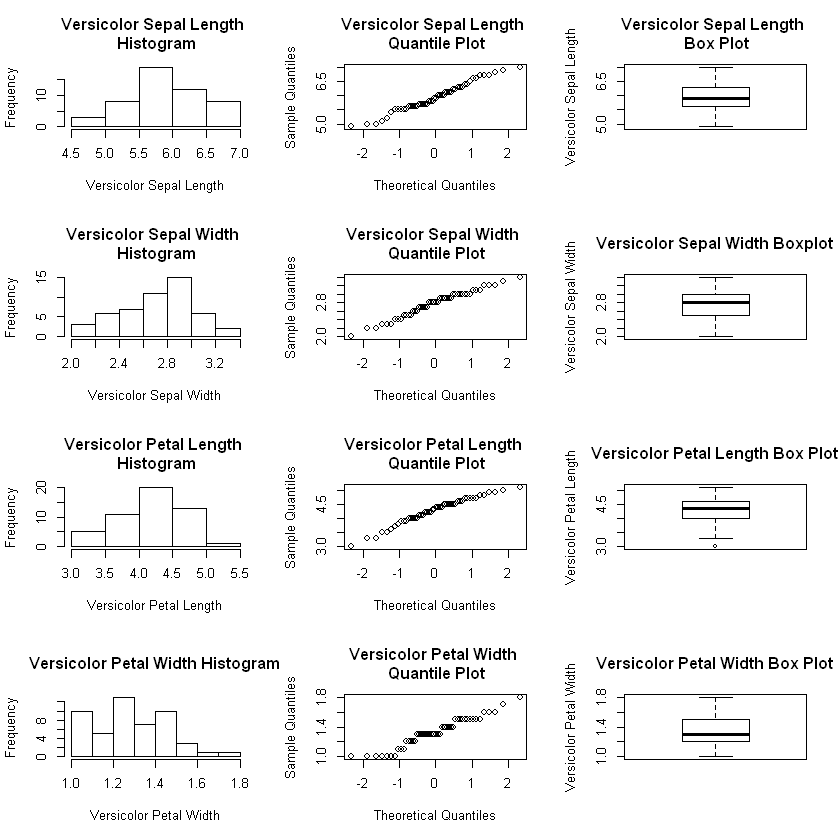

In [7]:
par(mfrow=c(4,3))
hist(versicolor$SepalLength,
     main = 'Versicolor Sepal Length \n Histogram',
     xlab = 'Versicolor Sepal Length')
qqnorm(versicolor$SepalLength,
       main = 'Versicolor Sepal Length \n Quantile Plot')
boxplot(versicolor$SepalLength,
        main = 'Versicolor Sepal Length \n Box Plot',
        ylab = 'Versicolor Sepal Length')
hist(versicolor$SepalWidth,
     main = 'Versicolor Sepal Width \n Histogram',
     xlab = 'Versicolor Sepal Width')
qqnorm(versicolor$SepalWidth,
       main = 'Versicolor Sepal Width \n Quantile Plot')
boxplot(versicolor$SepalWidth,
        main = 'Versicolor Sepal Width Boxplot',
        ylab = 'Versicolor Sepal Width')
hist(versicolor$PetalLength,
     main = 'Versicolor Petal Length \n Histogram',
     xlab = 'Versicolor Petal Length')
qqnorm(versicolor$PetalLength,
       main = 'Versicolor Petal Length \n Quantile Plot')
boxplot(versicolor$PetalLength,
        main = 'Versicolor Petal Length Box Plot',
        ylab = 'Versicolor Petal Length')
hist(versicolor$PetalWidth,
     main = 'Versicolor Petal Width Histogram',
     xlab = 'Versicolor Petal Width')
qqnorm(versicolor$PetalWidth,
       main = 'Versicolor Petal Width \n Quantile Plot')
boxplot(versicolor$PetalWidth,
        main = 'Versicolor Petal Width Box Plot',
        ylab = 'Versicolor Petal Width')

For the Versicolor species of Iris the variables of Sepal Width, Sepal Length, and Petal Length are approximately normal. While the Petal Width appears to be closer to normal than the Setosa species, but there does still appear to be some right skewness to the data. 

## Virginica

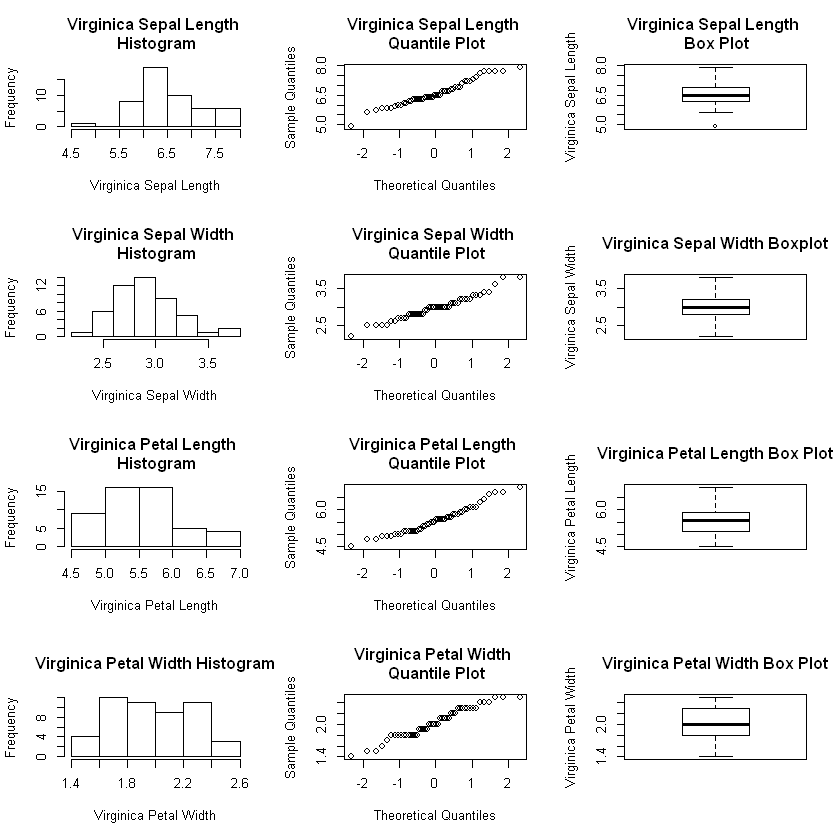

In [8]:
par(mfrow=c(4,3))
hist(virginica$SepalLength,
     main = 'Virginica Sepal Length \n Histogram',
     xlab = 'Virginica Sepal Length')
qqnorm(virginica$SepalLength,
       main = 'Virginica Sepal Length \n Quantile Plot')
boxplot(virginica$SepalLength,
        main = 'Virginica Sepal Length \n Box Plot',
        ylab = 'Virginica Sepal Length')
hist(virginica$SepalWidth,
     main = 'Virginica Sepal Width \n Histogram',
     xlab = 'Virginica Sepal Width')
qqnorm(virginica$SepalWidth,
       main = 'Virginica Sepal Width \n Quantile Plot')
boxplot(virginica$SepalWidth,
        main = 'Virginica Sepal Width Boxplot',
        ylab = 'Virginica Sepal Width')
hist(virginica$PetalLength,
     main = 'Virginica Petal Length \n Histogram',
     xlab = 'Virginica Petal Length')
qqnorm(virginica$PetalLength,
       main = 'Virginica Petal Length \n Quantile Plot')
boxplot(virginica$PetalLength,
        main = 'Virginica Petal Length Box Plot',
        ylab = 'Virginica Petal Length')
hist(virginica$PetalWidth,
     main = 'Virginica Petal Width Histogram',
     xlab = 'Virginica Petal Width')
qqnorm(virginica$PetalWidth,
       main = 'Virginica Petal Width \n Quantile Plot')
boxplot(virginica$PetalWidth,
        main = 'Virginica Petal Width Box Plot',
        ylab = 'Virginica Petal Width')

For the Virginica species of Iris the variables of Sepal Width, Sepal Length, and Petal Length are approximately normal. While the Petal Width appears to be almost a normal distribution but it appears to be slightly bimodal in its distribution.

In [9]:
setosa.cov <- cov(setosa)
versicolor.cov <- cov(versicolor)
virginica.cov <- cov(virginica)
print('Setosa Covariance Matrix')
setosa.cov
print('Versicolor Covariance Matrix')
versicolor.cov
print('Virginica Covariance Matrix')
virginica.cov

[1] "Setosa Covariance Matrix"


,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,0.12424898,0.099216327,0.016355102,0.010330612
SepalWidth,0.09921633,0.143689796,0.011697959,0.009297959
PetalLength,0.01635510,0.011697959,0.030159184,0.006069388
PetalWidth,0.01033061,0.009297959,0.006069388,0.011106122


[1] "Versicolor Covariance Matrix"


,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,0.26643265,0.08518367,0.18289796,0.05577959
SepalWidth,0.08518367,0.09846939,0.08265306,0.04120408
PetalLength,0.18289796,0.08265306,0.22081633,0.07310204
PetalWidth,0.05577959,0.04120408,0.07310204,0.03910612


[1] "Virginica Covariance Matrix"


,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,0.40434286,0.09376327,0.30328980,0.04909388
SepalWidth,0.09376327,0.10400408,0.07137959,0.04762857
PetalLength,0.30328980,0.07137959,0.30458776,0.04882449
PetalWidth,0.04909388,0.04762857,0.04882449,0.07543265


Reviewing the 3 covariance matrices for the 3 species of Iris it does not appear that they have the same covariance matrices. They appear to all be different from one another.

b. Test to determine whether the covariance matrices for the three species may be
pooled.
The hypotheses are defined as   
H0: The Covariance matrices are homogeneous and  
H1: The Covariance matrices are not homogeneous

In [10]:
library(heplots)
res <- boxM(iris[, 1:4],iris[, "Species"])

Warning message:
"package 'heplots' was built under R version 3.6.2"Loading required package: car
Warning message:
"package 'car' was built under R version 3.6.2"Loading required package: carData

Attaching package: 'car'

The following object is masked from 'package:boot':

    logit



In [11]:
summary(res)

Summary for Box's M-test of Equality of Covariance Matrices

Chi-Sq:	 140.943 
df:	 20 
p-value: < 2.2e-16 

log of Covariance determinants:
    setosa versicolor  virginica     pooled 
-13.067360 -10.874325  -8.927058  -9.958539 

Eigenvalues:
       setosa  versicolor  virginica     pooled
1 0.236455690 0.487873944 0.69525484 0.44356592
2 0.036918732 0.072384096 0.10655123 0.08618331
3 0.026796399 0.054776085 0.05229543 0.05535235
4 0.009033261 0.009790365 0.03426585 0.02236372

Statistics based on eigenvalues:
                setosa   versicolor    virginica       pooled
product   2.113088e-06 1.893828e-05 0.0001327479 4.732183e-05
sum       3.092041e-01 6.248245e-01 0.8883673469 6.074653e-01
precision 5.576122e-03 7.338788e-03 0.0169121236 1.304819e-02
max       2.364557e-01 4.878739e-01 0.6952548382 4.435659e-01


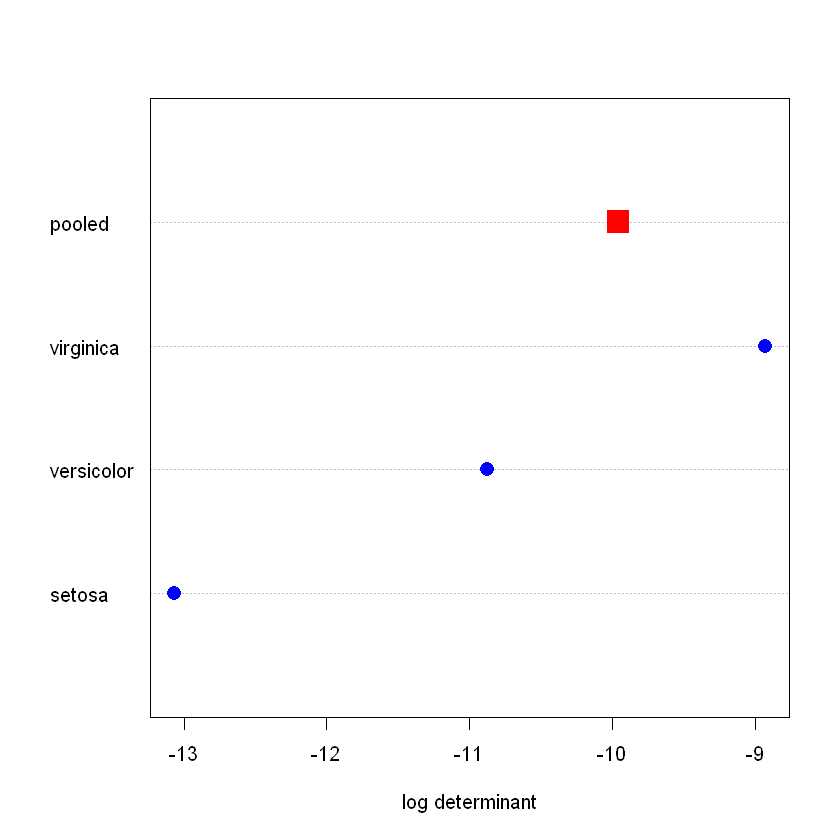

In [12]:
# visualize (what is done in the plot method)
# Do not transfer this to R Final File
dets <- res$logDet
ng <- length(res$logDet)-1
dotchart(dets, xlab = "log determinant")
points(dets , 1:4,  
	cex=c(rep(1.5, ng), 2.5), 
	pch=c(rep(16, ng), 15),
	col= c(rep("blue", ng), "red"))

Where the p-value for the chi-squared test is so small. We would reject the null hypothesis that the covariance matrices are homogenous which means the covariance matrices for the 3 species cannot be pooled. Instead we would use the within covariance matrices in the discriminant function.

c. Apply both LDA or QDA. Obtain the cross-validated confusion matrices and accuracy
    or error rates (by species and overall).

## LDA

In [13]:
# If you do LDA it pools the data so I will only want to include QDA in my output.
iris.lda.cv = lda(Species ~ ., CV = TRUE, data = iris)
iris.lda.conf.mat <- table(iris$Species, iris.lda.cv$class)

In [14]:

confusionMatrix(iris.lda.conf.mat)

Confusion Matrix and Statistics

            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         2
  virginica       0          1        49

Overall Statistics
                                          
               Accuracy : 0.98            
                 95% CI : (0.9427, 0.9959)
    No Information Rate : 0.34            
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.97            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9796           0.9608
Specificity                 1.0000            0.9802           0.9899
Pos Pred Value              1.0000            0.9600           0.9800
Neg Pred Value              1.0000            0.9900           0.9800
Prevalence

### Accuracy by Species & Overall
Setosa: 1.0  
Versicolor: 0.9799  
Verginica: 0.9753  
Overall: 0.98

## QDA

In [15]:
iris.qda.cv=qda(Species ~ ., CV=TRUE,data=iris)
iris.qda.conf.mat <- table(iris$Species,iris.qda.cv$class)

In [16]:
confusionMatrix(iris.qda.conf.mat)

Confusion Matrix and Statistics

            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         47         3
  virginica       0          1        49

Overall Statistics
                                          
               Accuracy : 0.9733          
                 95% CI : (0.9331, 0.9927)
    No Information Rate : 0.3467          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.96            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9792           0.9423
Specificity                 1.0000            0.9706           0.9898
Pos Pred Value              1.0000            0.9400           0.9800
Neg Pred Value              1.0000            0.9900           0.9700
Prevalence

### Accuracy by Species & Overall
Setosa: 1.0  
Versicolor: 0.9749   
Verginica: 0.9661  
Overall: 0.9733

d. Determine whether some of the measured variables are redundant and can be
    removed.

In [17]:
iris.qda.cv1 <- qda(Species ~ SepalLength+SepalWidth+PetalLength, CV=TRUE,data=iris)
iris.qda.conf.mat1 <- table(iris$Species,iris.qda.cv1$class)
confusionMatrix(iris.qda.conf.mat1)

Confusion Matrix and Statistics

            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         46         4
  virginica       0          4        46

Overall Statistics
                                          
               Accuracy : 0.9467          
                 95% CI : (0.8976, 0.9767)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.92            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9200           0.9200
Specificity                 1.0000            0.9600           0.9600
Pos Pred Value              1.0000            0.9200           0.9200
Neg Pred Value              1.0000            0.9600           0.9600
Prevalence

When I remove the variable PetalWidth the overall accuracy decreases to 94.67%

In [18]:
iris.qda.cv2 <- qda(Species ~ SepalLength+SepalWidth+PetalWidth, CV=TRUE,data=iris)
iris.qda.conf.mat2 <- table(iris$Species,iris.qda.cv2$class)
confusionMatrix(iris.qda.conf.mat2)

Confusion Matrix and Statistics

            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         45         5
  virginica       0          3        47

Overall Statistics
                                          
               Accuracy : 0.9467          
                 95% CI : (0.8976, 0.9767)
    No Information Rate : 0.3467          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.92            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9375           0.9038
Specificity                 1.0000            0.9510           0.9694
Pos Pred Value              1.0000            0.9000           0.9400
Neg Pred Value              1.0000            0.9700           0.9500
Prevalence

When I remove the variable PetalLength the overall accuracy decreases to 94.67%

In [19]:
iris.qda.cv3 <- qda(Species ~ SepalLength+PetalWidth+PetalLength, CV=TRUE,data=iris)
iris.qda.conf.mat3 <- table(iris$Species,iris.qda.cv3$class)
confusionMatrix(iris.qda.conf.mat3)

Confusion Matrix and Statistics

            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         2
  virginica       0          2        48

Overall Statistics
                                          
               Accuracy : 0.9733          
                 95% CI : (0.9331, 0.9927)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.96            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9600           0.9600
Specificity                 1.0000            0.9800           0.9800
Pos Pred Value              1.0000            0.9600           0.9600
Neg Pred Value              1.0000            0.9800           0.9800
Prevalence

When I remove SepalWidth the overall accuracy is the same value as when all 4 variables are present. It also looks like it increases the accuracy of predicting the Virginica up to 97% but it lowers the prediction accuracy of the Versicolor from 97.49% down to 97% accuracy.

In [20]:
iris.qda.cv4 <- qda(Species ~ SepalWidth+PetalWidth+PetalLength, CV=TRUE,data=iris)
iris.qda.conf.mat4 <- table(iris$Species,iris.qda.cv4$class)
confusionMatrix(iris.qda.conf.mat4)

Confusion Matrix and Statistics

            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         46         4
  virginica       0          1        49

Overall Statistics
                                          
               Accuracy : 0.9667          
                 95% CI : (0.9239, 0.9891)
    No Information Rate : 0.3533          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.95            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9787           0.9245
Specificity                 1.0000            0.9612           0.9897
Pos Pred Value              1.0000            0.9200           0.9800
Neg Pred Value              1.0000            0.9900           0.9600
Prevalence

Removing the variable SepalLength lowers the overall accuracy slightly and it lowers the accuracy of predicting the Versicolor and Virginica species. Overall it looks like you could remove the SepalWidth Variable and still have near to the same prediction results as you do with all four variables using QDA. But it appears even though the covariance matrices are so different which would generally say that we should use QDA. LDA still appears to out perform QDA.

2. I have placed a dataset called “Nest.csv” on the Canvas site for the class. This dataset contains
data on nest sites for three bird species—(Northern) Flicker, (Mountain) Chickadee, and (Rednaped) Sapsucker—plus a bunch of sites at which none of these birds are nesting. The
variable Nest is the response or grouping variable. Species indicates the species of nesting
bird, and StandType is a dummy variable coded as 0 for pure aspen forest and 1 for mixed
aspen and conifer.

In [21]:
nest <- read.csv("../../Data/Nest.csv")

In [22]:
head(nest)

Nest,Species,NumTreelt1in,NumTree1to3in,NumTree3to6in,NumTree6to9in,NumTree9to15in,NumTreegt15in,NumSnags,NumDownSnags,PctShrubCover,NumConifer,StandType
0,Non-nest,27,3,9,20,18,4,1,3,0.0,1,0
0,Non-nest,164,13,14,13,29,3,3,4,0.4,0,1
0,Non-nest,0,10,19,26,11,4,5,4,0.0,0,1
0,Non-nest,139,22,19,7,11,6,3,11,0.1,0,1
0,Non-nest,0,1,48,13,5,0,7,13,0.1,16,0
0,Non-nest,156,59,26,25,9,0,2,3,0.2,0,1


In [23]:
head(nest[,1:12])

Nest,Species,NumTreelt1in,NumTree1to3in,NumTree3to6in,NumTree6to9in,NumTree9to15in,NumTreegt15in,NumSnags,NumDownSnags,PctShrubCover,NumConifer
0,Non-nest,27,3,9,20,18,4,1,3,0.0,1
0,Non-nest,164,13,14,13,29,3,3,4,0.4,0
0,Non-nest,0,10,19,26,11,4,5,4,0.0,0
0,Non-nest,139,22,19,7,11,6,3,11,0.1,0
0,Non-nest,0,1,48,13,5,0,7,13,0.1,16
0,Non-nest,156,59,26,25,9,0,2,3,0.2,0


a. Carry out numerical and graphical summaries of all the predictor variables except
StandType. Are the variables approximately normal in distribution? If not, apply some
transformation(s) to “improve” the distributions of these variables.

In [24]:
nest.1 <- nest[nest$Nest == 1, 2:12]
nest.0 <- nest[nest$Nest == 0, 2:12]

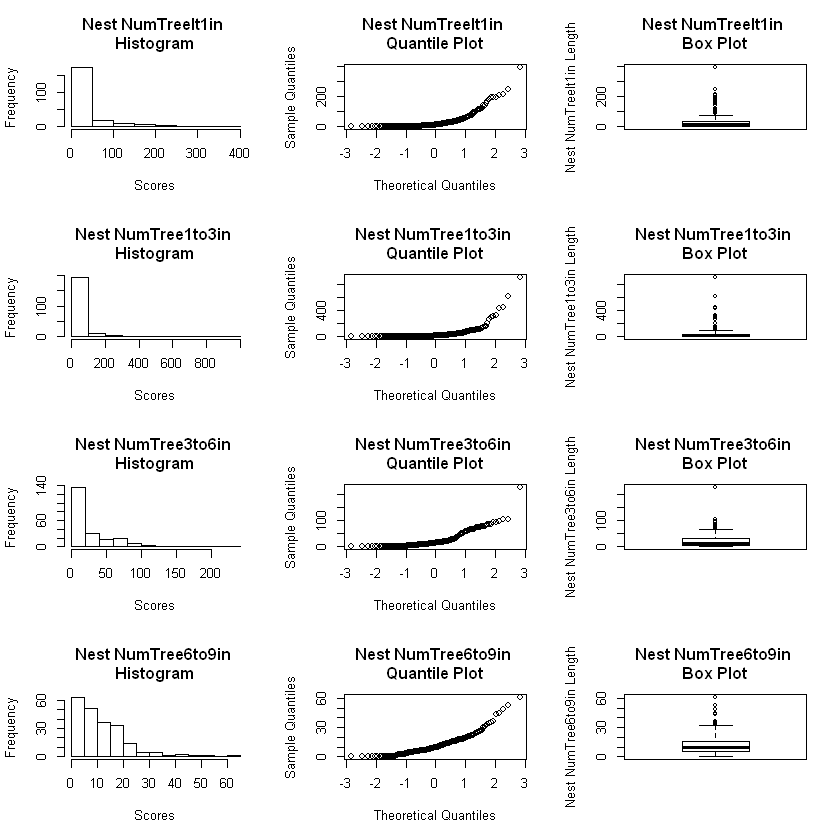

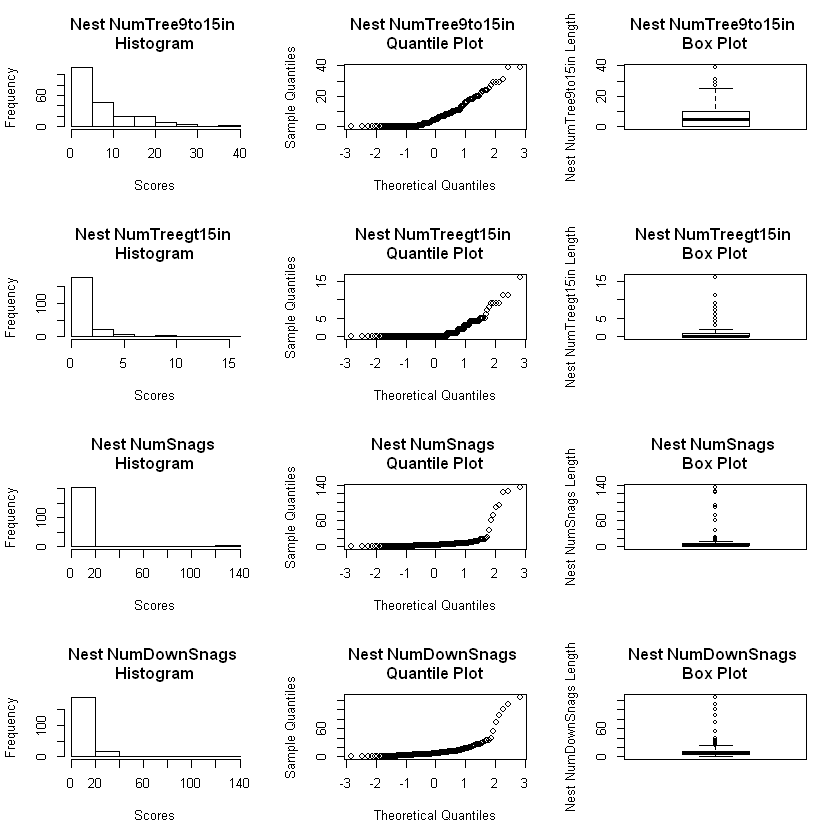

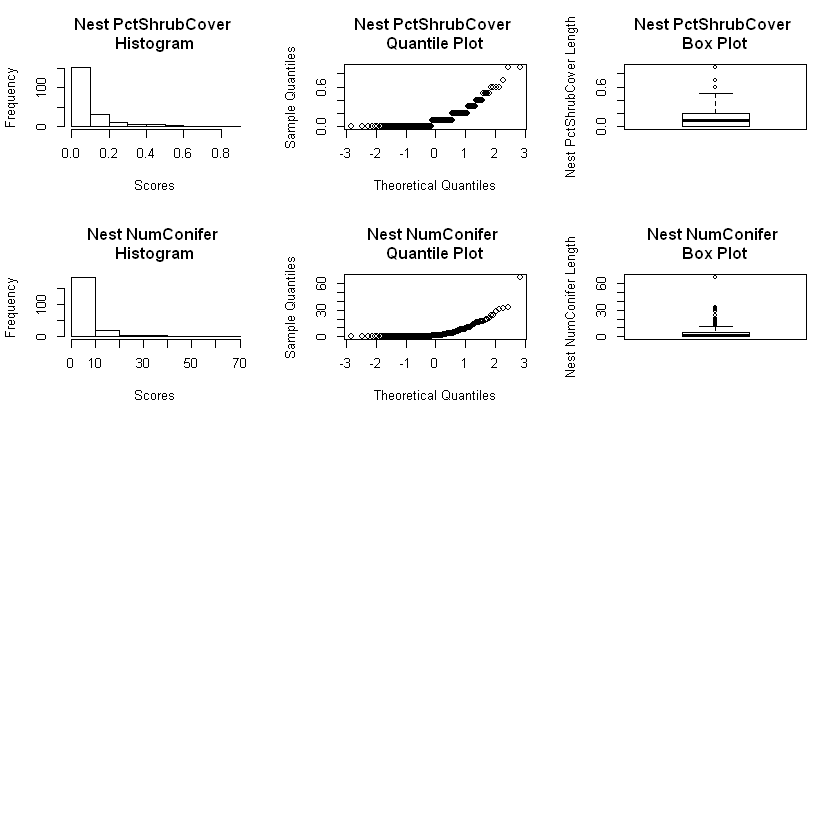

In [25]:
# Look at this link.
par(mfrow = c(4, 3))  # Set up a 2 x 2 plotting space

# Create the loop.vector (all the columns)
loop.vector <- 3:12

for (i in loop.vector) { # Loop over loop.vector

  # store data in column.i as x
  x <- nest[,i]
  col.name <- colnames(nest)[i]
  # Plot histogram of x
  hist(x,
       main = glue('Nest {col.name} \n Histogram'),
       xlab = "Scores")
    
    qqnorm(x,
       main = glue('Nest {col.name} \n Quantile Plot'))
    
    boxplot(x,
        main = glue('Nest {col.name} \n Box Plot'),
        ylab = glue('Nest {col.name} Length'))
}

All the data appears to be heavily skewed to the right. For this reason I will perform a log transformation and then see if the transformed data is closer to to a normal distribution.

In [26]:
nest.logt <- log(nest[,3:12]+1)
nest.log.df <- cbind(nest[,1:2], nest.logt)

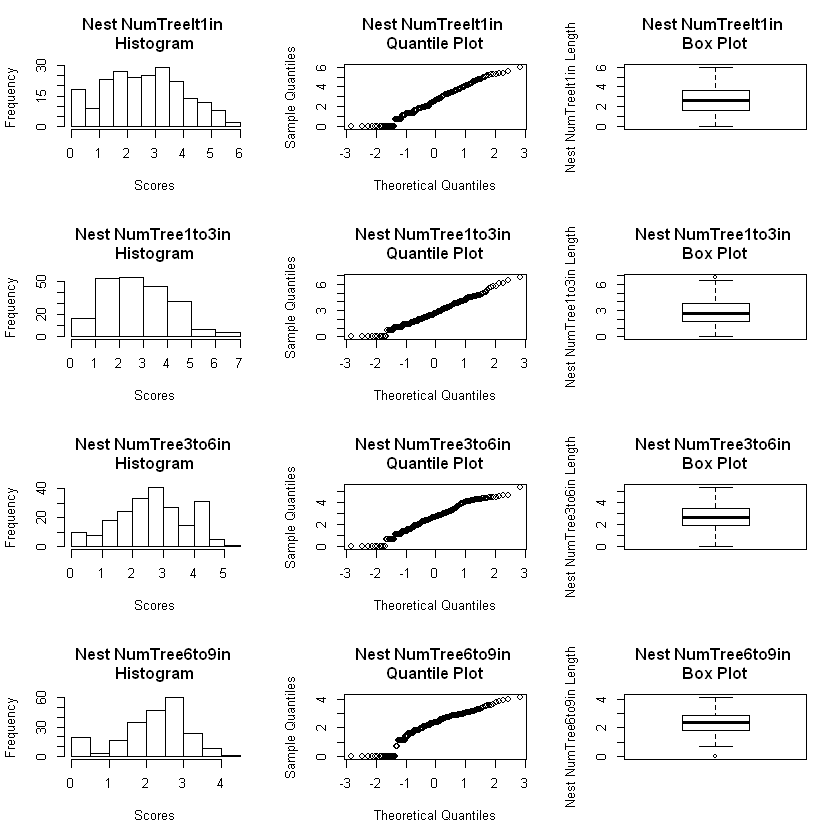

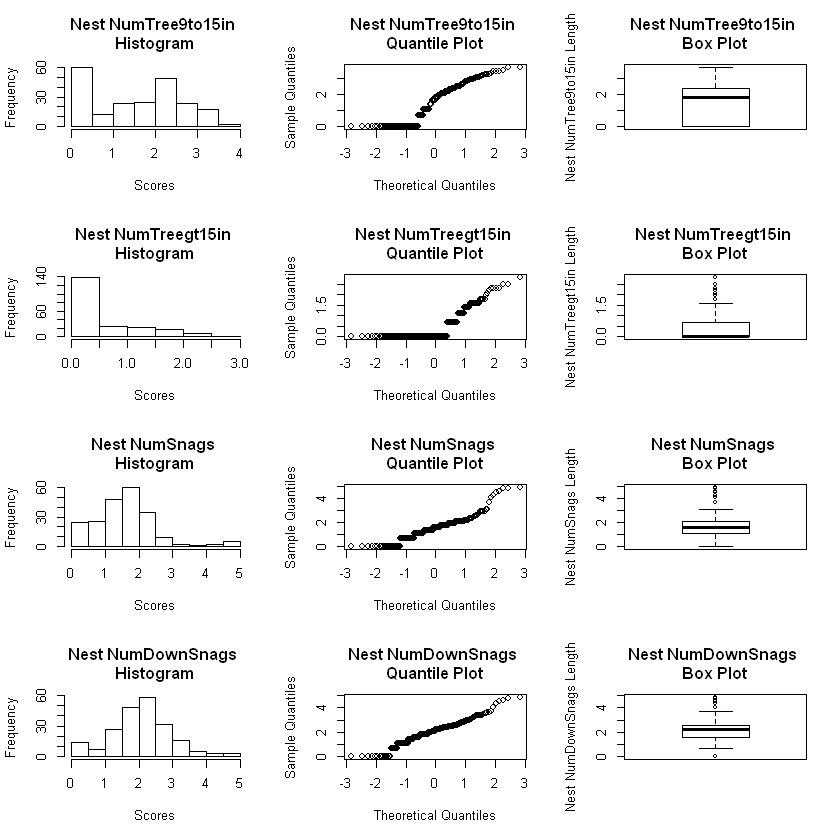

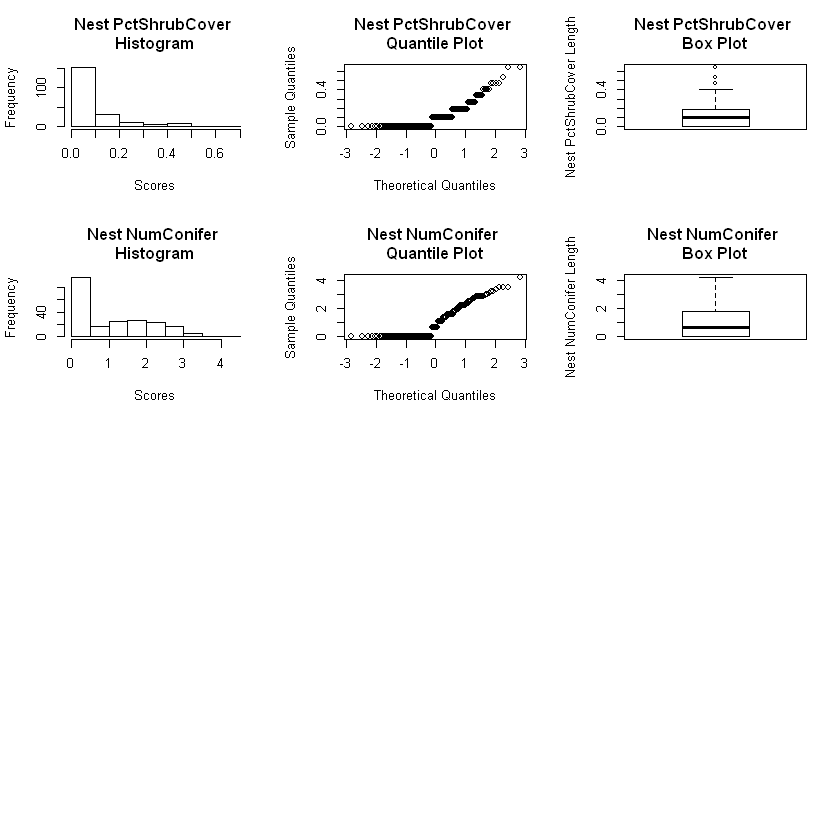

In [27]:
# Look at this link.
par(mfrow = c(4, 3))  # Set up a 2 x 2 plotting space

# Create the loop.vector (all the columns)
loop.vector <- 3:12

for (i in loop.vector) { # Loop over loop.vector

  # store data in column.i as x
  x <- nest.log.df[,i]
  col.name <- colnames(nest.log.df)[i]
  # Plot histogram of x
  hist(x,
       main = glue('Nest {col.name} \n Histogram'),
       xlab = "Scores")
    
    qqnorm(x,
       main = glue('Nest {col.name} \n Quantile Plot'))
    
    boxplot(x,
        main = glue('Nest {col.name} \n Box Plot'),
        ylab = glue('Nest {col.name} Length'))
}

After applying the transformations to my data it is still not perfectly normal but it is much closer to normal than it was before. But you can still see a grouping of data down near zero in many of the variables. PctShrubCover also appears to still be skewed to the right.

b. Fit LDA and QDA to all the data (with the transformed predictor variables) treating the
three birds as a single species. Compare the accuracies or error rates of your
classifications using cross-validation.

# LDA

In [28]:
head(nest.log.df)

Nest,Species,NumTreelt1in,NumTree1to3in,NumTree3to6in,NumTree6to9in,NumTree9to15in,NumTreegt15in,NumSnags,NumDownSnags,PctShrubCover,NumConifer
0,Non-nest,3.332205,1.3862944,2.302585,3.044522,2.944439,1.609438,0.6931472,1.386294,0.00000000,0.6931472
0,Non-nest,5.105945,2.6390573,2.708050,2.639057,3.401197,1.386294,1.3862944,1.609438,0.33647224,0.0000000
0,Non-nest,0.000000,2.3978953,2.995732,3.295837,2.484907,1.609438,1.7917595,1.609438,0.00000000,0.0000000
0,Non-nest,4.941642,3.1354942,2.995732,2.079442,2.484907,1.945910,1.3862944,2.484907,0.09531018,0.0000000
0,Non-nest,0.000000,0.6931472,3.891820,2.639057,1.791759,0.000000,2.0794415,2.639057,0.09531018,2.8332133
0,Non-nest,5.056246,4.0943446,3.295837,3.258097,2.302585,0.000000,1.0986123,1.386294,0.18232156,0.0000000


In [29]:
nest.log.lda <- lda(Nest ~ . - Species, CV = TRUE, data = nest.log.df)
nest.log.conf.mat <- table(nest.log.df$Nest, nest.log.lda$class)

In [30]:
confusionMatrix(nest.log.conf.mat)

Confusion Matrix and Statistics

   
     0  1
  0 80 26
  1 18 89
                                          
               Accuracy : 0.7934          
                 95% CI : (0.7328, 0.8457)
    No Information Rate : 0.5399          
    P-Value [Acc > NIR] : 1.073e-14       
                                          
                  Kappa : 0.5867          
                                          
 Mcnemar's Test P-Value : 0.2913          
                                          
            Sensitivity : 0.8163          
            Specificity : 0.7739          
         Pos Pred Value : 0.7547          
         Neg Pred Value : 0.8318          
             Prevalence : 0.4601          
         Detection Rate : 0.3756          
   Detection Prevalence : 0.4977          
      Balanced Accuracy : 0.7951          
                                          
       'Positive' Class : 0               
                                          

In [31]:
nest.log.qda <- qda(Nest ~ . - Species, CV = TRUE, data = nest.log.df)
nest.log.conf.mat2 <- table(nest.log.df$Nest, nest.log.qda$class)

In [32]:
confusionMatrix(nest.log.conf.mat2)

Confusion Matrix and Statistics

   
     0  1
  0 86 20
  1 19 88
                                          
               Accuracy : 0.8169          
                 95% CI : (0.7583, 0.8664)
    No Information Rate : 0.507           
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.6338          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8190          
            Specificity : 0.8148          
         Pos Pred Value : 0.8113          
         Neg Pred Value : 0.8224          
             Prevalence : 0.4930          
         Detection Rate : 0.4038          
   Detection Prevalence : 0.4977          
      Balanced Accuracy : 0.8169          
                                          
       'Positive' Class : 0               
                                          

In this instance QDA and LDA perform very similar in their classifications. When I run them through different times the LDA and QDA actually change which one is performing better. The first time I ran the LDA it performed at about 80% While the QDA was at 79%. The Second time I ran the tests LDA dropped to 79.34% and QDA went up to 81.90%. So they appear to be very similar in classifying when all the species are grouped together.

c. For each bird species separately, construct a dataset that comprises the data for all
the nest sites for that species, and all the non-nest sites. Now, refit LDA and QDA,
for each bird species separately and compare the results for the different methods.

In [33]:
summary(nest.log.df)

      Nest             Species     NumTreelt1in   NumTree1to3in  
 Min.   :0.0000   Chickadee: 42   Min.   :0.000   Min.   :0.000  
 1st Qu.:0.0000   Flicker  : 23   1st Qu.:1.609   1st Qu.:1.792  
 Median :1.0000   Non-nest :106   Median :2.639   Median :2.639  
 Mean   :0.5023   Sapsucker: 42   Mean   :2.595   Mean   :2.758  
 3rd Qu.:1.0000                   3rd Qu.:3.611   3rd Qu.:3.784  
 Max.   :1.0000                   Max.   :5.974   Max.   :6.810  
 NumTree3to6in   NumTree6to9in   NumTree9to15in  NumTreegt15in   
 Min.   :0.000   Min.   :0.000   Min.   :0.000   Min.   :0.0000  
 1st Qu.:1.946   1st Qu.:1.792   1st Qu.:0.000   1st Qu.:0.0000  
 Median :2.708   Median :2.398   Median :1.792   Median :0.0000  
 Mean   :2.656   Mean   :2.200   Mean   :1.511   Mean   :0.4488  
 3rd Qu.:3.466   3rd Qu.:2.833   3rd Qu.:2.398   3rd Qu.:0.6931  
 Max.   :5.425   Max.   :4.127   Max.   :3.689   Max.   :2.8332  
    NumSnags      NumDownSnags   PctShrubCover       NumConifer    
 Min.   

In [34]:
chickadee <- nest.log.df[nest.log.df$Species == "Chickadee",]
flicker <- nest.log.df[nest.log.df$Species == "Flicker",]
nonnest <- nest.log.df[nest.log.df$Species == "Non-nest",]
sapsucker <- nest.log.df[nest.log.df$Species == "Sapsucker",]

In [35]:
# Create the loop.vector (all the columns)
# species.list <- list(chickadee, flicker, nonnest, sapsucker)

# for (i in species.list) {
#     lda.nest <- lda(Nest ~ . - Species, CV = TRUE, data = i)
#     lda.nest2 <- table(i$Nest, lda.nest$class)
#     print(confusionMatrix(lda.nest2))
# }

In [36]:
lda.nest.flicker <- lda(Nest ~ . - Species, CV = TRUE, data = flicker)
lda.flicker <- table(flicker$Nest, lda.nest.flicker$class)
lda.flicker
# print(confusionMatrix(lda.flicker))
class.sum(flicker$Nest,predict(lda.nest.flicker)$posterior[,2])

   
     1
  1 23

ERROR: Error in UseMethod("predict"): no applicable method for 'predict' applied to an object of class "factor"


In [ ]:
summary(chickadee)

3. Continuing with the Nest data, with the transformed predictor variables, 

a. Fit a logistic regression model with all the data. Compare the cross-validated
accuracies or error rates with those for LDA and QDA that you obtained in the previous
question. 

In [37]:
nest.log.lr <- glm(Nest ~ . - Species, family = binomial, data = nest.log.df)
nest.lr.cfm <- table(nest.log.df$Nest, round(predict(nest.log.lr, type = "response")))
# class.sum(nest.log.lr$Nest, predict(nest.log.lr, type = "response"))  #Why does class.sum not work?
confusionMatrix(nest.lr.cfm)

Confusion Matrix and Statistics

   
     0  1
  0 83 23
  1 18 89
                                          
               Accuracy : 0.8075          
                 95% CI : (0.7481, 0.8582)
    No Information Rate : 0.5258          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.6149          
                                          
 Mcnemar's Test P-Value : 0.5322          
                                          
            Sensitivity : 0.8218          
            Specificity : 0.7946          
         Pos Pred Value : 0.7830          
         Neg Pred Value : 0.8318          
             Prevalence : 0.4742          
         Detection Rate : 0.3897          
   Detection Prevalence : 0.4977          
      Balanced Accuracy : 0.8082          
                                          
       'Positive' Class : 0               
                                          

In [38]:
# Cross validated Logistic Regression
nest.lr.xval=rep(0,nrow(nest.log.df))
xvs=rep(1:10,length=nrow(nest.log.df))
xvs=sample(xvs)
for(i in 1:10){
    train=nest.log.df[xvs!=i,]
    test=nest.log.df[xvs==i,]
    glub=glm(Nest~ . - Species,family=binomial,data=train)
    nest.lr.xval[xvs==i]=predict(glub,test,type="response")
}
nest.lr.cv.cfm <- table(nest.log.df$Nest,round(nest.lr.xval))
# class.sum(lichenLO$LobaOreg,Loreg.lr.xval)
confusionMatrix(nest.lr.cv.cfm)

Confusion Matrix and Statistics

   
     0  1
  0 80 26
  1 19 88
                                          
               Accuracy : 0.7887          
                 95% CI : (0.7277, 0.8415)
    No Information Rate : 0.5352          
    P-Value [Acc > NIR] : 1.255e-14       
                                          
                  Kappa : 0.5773          
                                          
 Mcnemar's Test P-Value : 0.3711          
                                          
            Sensitivity : 0.8081          
            Specificity : 0.7719          
         Pos Pred Value : 0.7547          
         Neg Pred Value : 0.8224          
             Prevalence : 0.4648          
         Detection Rate : 0.3756          
   Detection Prevalence : 0.4977          
      Balanced Accuracy : 0.7900          
                                          
       'Positive' Class : 0               
                                          

## Comparison between Question 2 and 3
I need to compare the accuracy rate between the Logistic Regression on the entire data set and the LDA and QDA.

In [39]:
# Test code not part of the homework
LAQI = read.csv("../../Data/LAQI.csv")
lichenLO=subset(LAQI,select=c(LobaOreg,TransAspect,Elevation,Slope,ACONIF,PctConifCov,DegreeDays,
                EvapoTransAve,EvapoTransDiff,MoistIndexAve,MoistIndexDiff,PrecipAve,PrecipDiff,
                RelHumidAve,RelHumidDiff,TempAve,TempDiff,VapPressAve,VapPressDiff,PotGlobRadAve,
                PotGlobRadDiff))

In [43]:
Loreg.lr = glm(LobaOreg~ . ,family=binomial,data=lichenLO)
tab <- table(round(predict(Loreg.lr,type="response")),lichenLO$LobaOreg)
tab1 <- table(lichenLO$LobaOreg,round(predict(Loreg.lr,type="response")))
tab1
tab
class.sum(lichenLO$LobaOreg,predict(Loreg.lr,type="response"))
confusionMatrix(tab)
confusionMatrix(round(predict(Loreg.lr,type="response")), lichenLO$LobaOreg)

   
      0   1
  0 608  45
  1  74 113

   
      0   1
  0 608  74
  1  45 113

Percent Correctly Classified =,85.83
Specificity =,93.11
Sensitivity =,60.43
Kappa =,0.5667
AUC=,0.9162


Confusion Matrix and Statistics

   
      0   1
  0 608  74
  1  45 113
                                          
               Accuracy : 0.8583          
                 95% CI : (0.8329, 0.8812)
    No Information Rate : 0.7774          
    P-Value [Acc > NIR] : 2e-09           
                                          
                  Kappa : 0.5667          
                                          
 Mcnemar's Test P-Value : 0.01027         
                                          
            Sensitivity : 0.9311          
            Specificity : 0.6043          
         Pos Pred Value : 0.8915          
         Neg Pred Value : 0.7152          
             Prevalence : 0.7774          
         Detection Rate : 0.7238          
   Detection Prevalence : 0.8119          
      Balanced Accuracy : 0.7677          
                                          
       'Positive' Class : 0               
                                          

ERROR: Error: `data` and `reference` should be factors with the same levels.


From the confusionMatrix function you must enter it as (predicted, actual) and then it will plot columns as the actual and rows as the predicted.

In [52]:
table(lichenLO$LobaOreg)
table(lichenLO$LobaOreg,round(predict(Loreg.lr,type="response")))


  0   1 
653 187 

   
      0   1
  0 608  45
  1  74 113

b. Now apply some variable selection procedure (in logistic regression) and identify
variables important to the classification. By how much did the cross-validated
accuracies/error rates change?

step function within R to do the variable selection.

c. Repeat part a. using the datasets for the individual bird species. 

d. Repeat part b. using the datasets for the individual bird species. Are there variables
that are in the models for 2 or 3 of the species?